# 0.引入类库 设置全局变量

In [1]:
import os
import numpy as np
import pandas as pd
pd.set_option("display.max_colwidth",None)  #

import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False  # 用来正常显示负号
import seaborn as sns

In [2]:
DATA_PATH = './input/'

# 1.查看所有数据源基础信息

In [3]:
os.listdir(DATA_PATH)

['data_description.txt', 'sample_submission.csv', 'test.csv', 'train.csv']

In [4]:
train = pd.read_csv(DATA_PATH +'train.csv')
test = pd.read_csv(DATA_PATH +'test.csv')
sample_submission = pd.read_csv(DATA_PATH +'sample_submission.csv')

In [5]:
train.shape, test.shape, sample_submission.shape

((1460, 81), (1459, 80), (1459, 2))

In [6]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [8]:
sample_submission.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [11]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Id         1459 non-null   int64  
 1   SalePrice  1459 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 22.9 KB


In [12]:
set(train.columns) - set(test.columns)

{'SalePrice'}

In [13]:
set(i for i in train.dtypes.items()) - set(i for i in test.dtypes.items())

{('BsmtFinSF1', dtype('int64')),
 ('BsmtFinSF2', dtype('int64')),
 ('BsmtFullBath', dtype('int64')),
 ('BsmtHalfBath', dtype('int64')),
 ('BsmtUnfSF', dtype('int64')),
 ('GarageArea', dtype('int64')),
 ('GarageCars', dtype('int64')),
 ('SalePrice', dtype('int64')),
 ('TotalBsmtSF', dtype('int64'))}

In [14]:
set(i for i in test.dtypes.items()) - set(i for i in train.dtypes.items())

{('BsmtFinSF1', dtype('float64')),
 ('BsmtFinSF2', dtype('float64')),
 ('BsmtFullBath', dtype('float64')),
 ('BsmtHalfBath', dtype('float64')),
 ('BsmtUnfSF', dtype('float64')),
 ('GarageArea', dtype('float64')),
 ('GarageCars', dtype('float64')),
 ('TotalBsmtSF', dtype('float64'))}

测试集与训练集属性名称一致，标签SalePrice默认格式是int64，另有8个属性在训练集中的默认格式是int64，在测试集中的默认格式是float64

# 2.单变量分析

## 2.1 SalePrice 资产的售价 the property's sale price in dollars （标签）
属性释义：需要尝试去预测的标签属性。
> This is the target variable that you're trying to predict.

数据类型：int64
数据类别：数值型
单位：美元
取值范围：34,900~755,000
缺失值：无
异常值：无

In [15]:
train.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

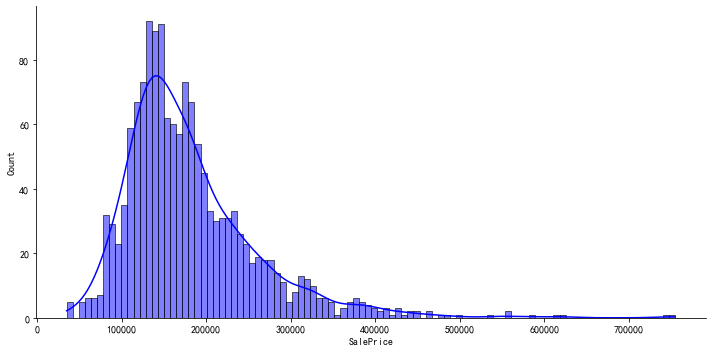

In [16]:
sns.displot(train.SalePrice, kind='hist', kde=True, color='b', bins=100, height=5, aspect=2)

## 2.2 Id 序号 （索引）

In [17]:
assert len(train.Id) + len(test.Id) == len(set(train.Id) | set(test.Id))

结论：训练集与测试集之间及内部无重复Id

## 2.3 MSSubClass 建筑类别 The building class
属性释义：标识销售中涉及的住宅类型。
> Identifies the type of dwelling involved in the sale.

数据类型：int64
数据类别：无序类别型

取值范围：
+  20 1-STORY 1946 & NEWER ALL STYLES
+  30 1-STORY 1945 & OLDER
+  40 1-STORY W/FINISHED ATTIC ALL AGES
+  45 1-1/2 STORY - UNFINISHED ALL AGES
+  50 1-1/2 STORY FINISHED ALL AGES
+  60 2-STORY 1946 & NEWER
+  70 2-STORY 1945 & OLDER
+  75 2-1/2 STORY ALL AGES
+  80 SPLIT OR MULTI-LEVEL
+  85 SPLIT FOYER
+  90 DUPLEX - ALL STYLES AND AGES
+ 120 1-STORY PUD (Planned Unit Development) - 1946 & NEWER
+ 150 1-1/2 STORY PUD - ALL AGES
+ 160 2-STORY PUD - 1946 & NEWER
+ 180 PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
+ 190 2 FAMILY CONVERSION - ALL STYLES AND AGES

缺失值：无
异常值：无

In [18]:
MSSubClass_kinds = {20, 30, 40, 45, 50, 60, 70, 75, 80, 85, 90, 120, 150, 160, 180, 190}
train_MSSubClass_set = set(train['MSSubClass'])
test_MSSubClass_set = set(test['MSSubClass'])
MSSubClass_set = train_MSSubClass_set & test_MSSubClass_set
assert MSSubClass_set - MSSubClass_kinds == set()

结论：MSSubClass属性不存在取值范围之外的异常值

In [19]:
MSSubClass_kinds - train_MSSubClass_set

{150}

结论：训练集MSSubClass属性不含150 1-1/2 STORY PUD - ALL AGES

In [20]:
MSSubClass_kinds - test_MSSubClass_set

set()

结论：测试集MSSubClass属性包含了所有可能的值

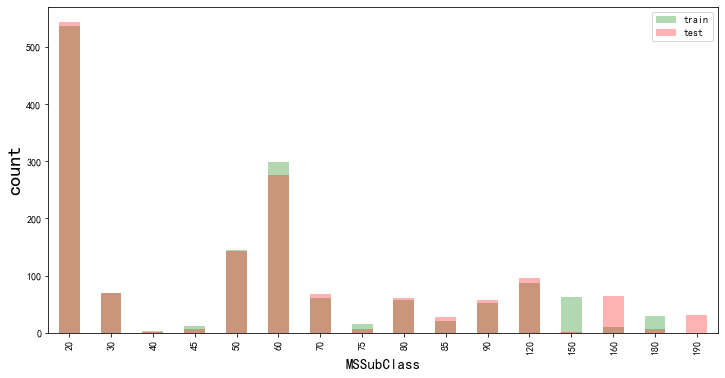

In [21]:
train['MSSubClass'].value_counts().sort_index().plot(kind='bar', color='g', alpha=0.3, figsize=(12,6))
test['MSSubClass'].value_counts().sort_index().plot(kind='bar', color='r', alpha=0.3, figsize=(12,6))
plt.xlabel('MSSubClass',fontdict={'size':15})
plt.ylabel('count',fontdict={'size':20})
plt.legend(['train','test'])
plt.show()

## 2.4 MSZoning 土地类别 The general zoning classification
属性释义：销售过程中土地类别的标识符。
>Identifies the general zoning classification of the sale.

数据类型：object
数据类别：无序类别

取值范围：
+ A	Agriculture 农业
+ C	Commercial 商业
+ FV	Floating Village Residential 浮动乡村住宅
+ I	Industrial 工业
+ RH	Residential High Density 高密度居民区
+ RL	Residential Low Density 低密度居民区
+ RP	Residential Low Density Park 低密度公园
+ RM	Residential Medium Density 中等密度居民区

缺失值：
异常值：

## 2.5 LotFrontage 房屋与街道的直线距离 Linear feet of street connected to property
数据类型：float64
数据类别：数值型
单位：英尺
取值范围：
缺失值：
异常值：

## 2.6 LotArea 地块面积 Lot size in square feet
数据类型：int64
数据类别：数值型
单位：平方英尺
取值范围：训练集1300-215245，测试集1470-56600
缺失值：无
异常值：无

In [49]:
[(x.isnull().sum(), x.min(), x.max()) for x in [train.LotArea, test.LotArea]]

[(0, 1300, 215245), (0, 1470, 56600)]

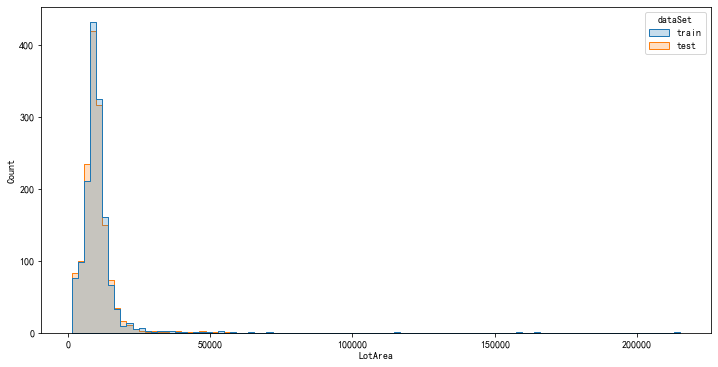

In [45]:
train_df = train['LotArea'].copy().to_frame()
test_df = test['LotArea'].copy().to_frame()
train_df['dataSet'] = 'train'
test_df['dataSet'] = 'test'
df = pd.concat([train_df, test_df]).reset_index()
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='LotArea', bins=100, hue='dataSet', element='step')
plt.show()

## 2.7 Street 道路类型 Type of road access
字段释义：与地产相连接的道路类型
>Type of road access to property

数据类型：object
数据类别：无序类别型
取值范围：
+ Grvl	Gravel 砂石路
+ Pave	Paved 铺装路

缺失值：无
异常值：无

In [52]:
set(train.Street),set(test.Street)

({'Grvl', 'Pave'}, {'Grvl', 'Pave'})

In [55]:
[data_set.Street.isnull().sum() for data_set in (train, test)]

[0, 0]

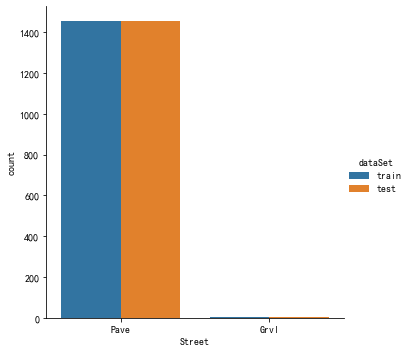

In [78]:
train_df, test_df = (ds['Street'].value_counts().reset_index().copy()
                     for ds in [train, test])
train_df['dataSet'] = 'train'
test_df['dataSet'] = 'test'
df = pd.concat([train_df, test_df])
df.columns = ['Street', 'count', 'dataSet']
sns.catplot(data=df, kind='bar', x='Street', y='count', hue='dataSet')

## 2.8 Alley 小街类型 Type of alley access
字段释义：与地产相连的小街类型
>Type of alley access to property

数据类型：object
数据类别：无序类别型
取值范围：
+ Grvl	Gravel 砂石路
+ Pave	Paved 铺装路
+ NA 	No alley access 没有小街

缺失值：训练集缺失94%，测试集缺失93%
异常值：无


In [79]:
set(train.Alley),set(test.Alley)

({'Grvl', 'Pave', nan}, {'Grvl', 'Pave', nan})

In [83]:
[data_set.Alley.isnull().sum() / data_set.shape[0] * 100
 for data_set in (train, test)]

[93.76712328767123, 92.66620973269363]

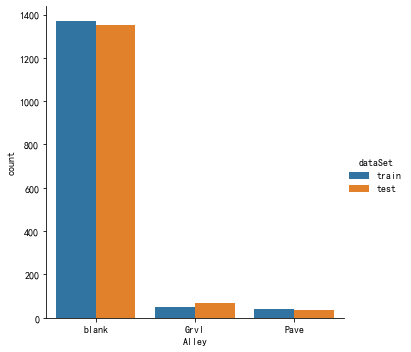

In [85]:
train_df, test_df = (ds['Alley'].copy().fillna('blank').value_counts().reset_index()
                     for ds in [train, test])
train_df['dataSet'] = 'train'
test_df['dataSet'] = 'test'
df = pd.concat([train_df, test_df])
df.columns = ['Alley', 'count', 'dataSet']
sns.catplot(data=df, kind='bar', x='Alley', y='count', hue='dataSet')

## 2.9 LotShape 户型规整程度  General shape of property
数据类型：object
数据类别：有序类别型
取值范围：
+ Reg	Regular 规整
+ IR1	Slightly irregular 略微不规整
+ IR2	Moderately Irregular 中度不规整
+ IR3	Irregular 不规整

缺失值：
异常值：

## 2.10 LandContour 地面平坦状况 Flatness of the property
数据类型：object
数据类别：无序类别型
取值范围：
+ Lvl	Near Flat/Level 近乎平坦或水平
+ Bnk	Banked - Quick and significant rise from street grade to building 隆起
+ HLS	Hillside - Significant slope from side to side 斜坡
+ Low	Depression 低洼地

缺失值：
异常值：

## 2.11 Utilities 资源联通情况 Type of utilities available
数据类型：object
数据类别：有序类别型
取值范围：
+ AllPub	All public Utilities (E,G,W,& S) 通电、燃气、上水、下水
+ NoSewr	Electricity, Gas, and Water (Septic Tank) 通电、燃气、上水
+ NoSeWa	Electricity and Gas Only 通电、燃气
+ ELO	Electricity only 仅通电

缺失值：
异常值：

## 2.12 LotConfig 临街状况 Lot configuration
数据类型：object
数据类别：无序类别型
取值范围：
+ Inside	Inside lot 内部地块
+ Corner	Corner lot 转角地块
+ CulDSac	Cul-de-sac 死胡同
+ FR2	Frontage on 2 sides of property 对面临街
+ FR3	Frontage on 3 sides of property 三面临街

缺失值：
异常值：

## 2.13 LandSlope 土地坡度 Slope of property
数据类型：object
数据类别：有序类别型
取值范围：
+ Gtl	Gentle slope 缓坡
+ Mod	Moderate Slope 中等坡度
+ Sev	Severe Slope 严重坡度

缺失值：
异常值：


## 2.14 Neighborhood  城市范围内的实际位置 Physical locations within Ames city limits
数据类型：object
数据类别：无序类别型
取值范围：
+  Blmngtn	Bloomington Heights
+  Blueste	Bluestem
+  BrDale	Briardale
+  BrkSide	Brookside
+  ClearCr	Clear Creek
+  CollgCr	College Creek
+  Crawfor	Crawford
+  Edwards	Edwards
+  Gilbert	Gilbert
+  IDOTRR	Iowa DOT and Rail Road
+  MeadowV	Meadow Village
+  Mitchel	Mitchell
+  Names	North Ames
+  NoRidge	Northridge
+  NPkVill	Northpark Villa
+  NridgHt	Northridge Heights
+  NWAmes	Northwest Ames
+  OldTown	Old Town
+  SWISU	South & West of Iowa State University
+  Sawyer	Sawyer
+  SawyerW	Sawyer West
+  Somerst	Somerset
+  StoneBr	Stone Brook
+  Timber	Timberland
+  Veenker	Veenker

缺失值：无
异常值：无

## 2.15 Condition1 相邻的公路或铁路 Proximity to main road or railroad
数据类型：object
数据类别：无序类别型
取值范围：
+ Artery	Adjacent to arterial street
+ Feedr	Adjacent to feeder street
+ Norm	Normal
+ RRNn	Within 200' of North-South Railroad
+ RRAn	Adjacent to North-South Railroad
+ PosN	Near positive off-site feature--park, greenbelt, etc.
+ PosA	Adjacent to postive off-site feature
+ RRNe	Within 200' of East-West Railroad
+ RRAe	Adjacent to East-West Railroad

缺失值：无
异常值：无

## 2.16 Condition2 相邻的第二个公路或铁路 Proximity to main road or railroad (if a second is present)
数据类型：object
数据类别：无序类别型
取值范围：
+ Artery	Adjacent to arterial street
+ Feedr	Adjacent to feeder street
+ Norm	Normal
+ RRNn	Within 200' of North-South Railroad
+ RRAn	Adjacent to North-South Railroad
+ PosN	Near positive off-site feature--park, greenbelt, etc.
+ PosA	Adjacent to postive off-site feature
+ RRNe	Within 200' of East-West Railroad
+ RRAe	Adjacent to East-West Railroad

缺失值：无
异常值：无

## 2.17 BldgType 住宅类型 Type of dwelling
数据类型：object
数据类别：无序类别型
取值范围：
+ 1Fam	Single-family Detached	独栋
+ 2FmCon	Two-family Conversion; originally built as one-family dwelling 叠拼
+ Duplx	Duplex 跃层
+ TwnhsE	Townhouse End Unit 联排边户
+ TwnhsI	Townhouse Inside Unit 联排中间户

缺失值：无
异常值：无

## 2.18 HouseStyle 房屋风格 Style of dwelling
数据类型：object
数据类别：无序类别型
取值范围：
+ 1Story	One story
+ 1.5Fin	One and one-half story: 2nd level finished
+ 1.5Unf	One and one-half story: 2nd level unfinished
+ 2Story	Two story
+ 2.5Fin	Two and one-half story: 2nd level finished
+ 2.5Unf	Two and one-half story: 2nd level unfinished
+ SFoyer	Split Foyer
+ SLvl	Split Level

缺失值：无
异常值：无

## 2.19 OverallQual 装修程度 Overall material and finish quality
属性释义：房屋用料和饰面评级
>Rates the overall material and finish of the house

数据类型：int64
数据类别：有序类别
取值范围：
+ 10	Very Excellent
+ 9	Excellent
+ 8	Very Good
+ 7	Good
+ 6	Above Average
+ 5	Average
+ 4	Below Average
+ 3	Fair
+ 2	Poor
+ 1	Very Poor

缺失值：无
异常值：无

## 2.20 OverallCond 综合状况 Overall condition rating
属性释义：房屋状况评级
>Rates the overall condition of the house

数据类型：int64
数据类别：
取值范围：
+ 10	Very Excellent
+ 9	Excellent
+ 8	Very Good
+ 7	Good
+ 6	Above Average
+ 5	Average
+ 4	Below Average
+ 3	Fair
+ 2	Poor
+ 1	Very Poor

缺失值：无
异常值：无

## 2.21 YearBuilt 建筑年份 Original construction date
数据类型：int64
数据类别：日期
单位：年
取值范围：
缺失值：无
异常值：无

## 2.22 YearRemodAdd 改建日期 Remodel date
属性释义：改建日期（如果没有改建过，同建筑日期）
> Remodel date (same as construction date if no remodeling or additions)

数据类型：int64
数据类别：日期
单位：年
取值范围：
缺失值：无
异常值：无

## 2.23 RoofStyle 屋顶类型 Type of roof
数据类型：object
数据类别：无序类别型
取值范围：
+ Flat	Flat
+ Gable	Gable
+ Gambrel	Gabrel (Barn)
+ Hip	Hip
+ Mansard	Mansard
+ Shed	Shed

缺失值：无
异常值：无

## 2.24 RoofMatl 屋顶材料 Roof material
数据类型：object
数据类别：无序类别型
取值范围：
+ ClyTile	Clay or Tile
+ CompShg	Standard (Composite) Shingle
+ Membran	Membrane
+ Metal	Metal
+ Roll	Roll
+ Tar&Grv	Gravel & Tar
+ WdShake	Wood Shakes
+ WdShngl	Wood Shingles

缺失值：无
异常值：无

## 2.25 Exterior1st 房屋外部覆盖物 Exterior covering on house
数据类型：object
数据类别：无序类别型
取值范围：
+ AsbShng	Asbestos Shingles
+ AsphShn	Asphalt Shingles
+ BrkComm	Brick Common
+ BrkFace	Brick Face
+ CBlock	Cinder Block
+ CemntBd	Cement Board
+ HdBoard	Hard Board
+ ImStucc	Imitation Stucco
+ MetalSd	Metal Siding
+ Other	Other
+ Plywood	Plywood
+ PreCast	PreCast
+ Stone	Stone
+ Stucco	Stucco
+ VinylSd	Vinyl Siding
+ Wd Sdng	Wood Siding
+ WdShing	Wood Shingles

缺失值：无
异常值：无

## 2.26 Exterior2nd 第二种房屋外部覆盖物 Exterior covering on house (if more than one material)
数据类型：object
数据类别：无序类别型
取值范围：
+ AsbShng	Asbestos Shingles
+ AsphShn	Asphalt Shingles
+ BrkComm	Brick Common
+ BrkFace	Brick Face
+ CBlock	Cinder Block
+ CemntBd	Cement Board
+ HdBoard	Hard Board
+ ImStucc	Imitation Stucco
+ MetalSd	Metal Siding
+ Other	Other
+ Plywood	Plywood
+ PreCast	PreCast
+ Stone	Stone
+ Stucco	Stucco
+ VinylSd	Vinyl Siding
+ Wd Sdng	Wood Siding
+ WdShing	Wood Shingles

缺失值：
异常值：

## 2.27 MasVnrType 石制装饰面类型 Masonry veneer type
数据类型：object
数据类别：无序类别型
取值范围：
+ BrkCmn	Brick Common
+ BrkFace	Brick Face
+ CBlock	Cinder Block
+ None	None
+ Stone	Stone

缺失值：
异常值：

## 2.28 MasVnrArea 石制装饰面面积 Masonry veneer area in square feet
数据类型：float64
数据类别：数值型
单位：平方英尺
取值范围：
缺失值：
异常值：

## 2.29 ExterQual 外观质量 Exterior material quality
属性释义：从外观评估材料的质量
>Evaluates the quality of the material on the exterior

数据类型：object
数据类别：有序类别型
取值范围：
+ Ex	Excellent
+ Gd	Good
+ TA	Average/Typical
+ Fa	Fair
+ Po	Poor

缺失值：
异常值：

## 2.30 ExterCond 外观状况 condition of the material on the exterior
属性释义：从外观评估材料的现状
>Evaluates the present condition of the material on the exterior

数据类型：object
数据类别：有序类别型
取值范围：
+ Ex	Excellent
+ Gd	Good
+ TA	Average/Typical
+ Fa	Fair
+ Po	Poor

缺失值：
异常值：

## 2.31 Foundation 地基类型 Type of foundation
数据类型：object
数据类别：无序类别型
取值范围：
+ BrkTil	Brick & Tile
+ CBlock	Cinder Block
+ PConc	Poured Contrete
+ Slab	Slab
+ Stone	Stone
+ Wood	Wood

缺失值：
异常值：

## 2.32 BsmtQual  Height of the basement
属性释义：评估地下室高度
>Evaluates the height of the basement

数据类型：object
数据类别：有序类别型
取值范围：
+ Ex	Excellent (100+ inches)
+ Gd	Good (90-99 inches)
+ TA	Typical (80-89 inches)
+ Fa	Fair (70-79 inches)
+ Po	Poor (<70 inches
+ NA	No Basement

缺失值：
异常值：

## 2.33 BsmtCond  General condition of the basement
属性释义：评估地下室整体状况
>Evaluates the general condition of the basement

数据类型：object
数据类别：有序类别型
取值范围：
+ Ex	Excellent
+ Gd	Good
+ TA	Typical - slight dampness allowed
+ Fa	Fair - dampness or some cracking or settling
+ Po	Poor - Severe cracking, settling, or wetness
+ NA	No Basement

缺失值：
异常值：


## 2.34 BsmtExposure 地下室采光 Walkout or garden level basement walls
属性释义：指露台或花园级别的墙体采光
>Refers to walkout or garden level walls

数据类型：object
数据类别：有序类别型
取值范围：
+ Gd	Good Exposure
+ Av	Average Exposure (split levels or foyers typically score average or above)
+ Mn	Mimimum Exposure
+ No	No Exposure
+ NA	No Basement

缺失值：
异常值：

## 2.35 BsmtFinType1 地下室竣工区质量 Quality of basement finished area
数据类型：object
数据类别：有序类别型
取值范围：
+ GLQ	Good Living Quarters
+ ALQ	Average Living Quarters
+ BLQ	Below Average Living Quarters
+ Rec	Average Rec Room
+ LwQ	Low Quality
+ Unf	Unfinshed
+ NA	No Basement

缺失值：
异常值：

## 2.36 BsmtFinSF1 地下室竣工区面积 Type 1 finished square feet
数据类型：float64/int64
数据类别：数值型
单位：平方英尺
取值范围：
缺失值：
异常值：

## 2.37 BsmtFinType2 地下室第二块竣工区质量 Quality of second finished area (if present)
数据类型：object
数据类别：有序类别型
取值范围：
+ GLQ	Good Living Quarters
+ ALQ	Average Living Quarters
+ BLQ	Below Average Living Quarters
+ Rec	Average Rec Room
+ LwQ	Low Quality
+ Unf	Unfinshed
+ NA	No Basement

缺失值：
异常值：

## 2.38 BsmtFinSF2 第二块地下室竣工区面积 Type 2 finished square feet
数据类型：float64/int64
数据类别：数值型
单位：平方英尺
取值范围：
缺失值：
异常值：

## 2.39 BsmtUnfSF 地下室未竣工区面积 Unfinished square feet of basement area
数据类型：float64/int64
数据类别：数值型
单位：平方英尺
取值范围：
缺失值：
异常值：

## 2.40 TotalBsmtSF 地下室总面积 Total square feet of basement area
数据类型：float64/int64
数据类别：数值型
单位：平方英尺
取值范围：
缺失值：
异常值：

## 2.41 Heating 加热类型 Type of heating
数据类型：object
数据类别：无序类别型
取值范围：
+ Floor	Floor Furnace
+ GasA	Gas forced warm air furnace
+ GasW	Gas hot water or steam heat
+ Grav	Gravity furnace
+ OthW	Hot water or steam heat other than gas
+ Wall	Wall furnace
缺失值：
异常值：

## 2.42 HeatingQC 家人质量和状况 Heating quality and condition
数据类型：object
数据类别：有序类别型
取值范围：
+ Ex	Excellent
+ Gd	Good
+ TA	Average/Typical
+ Fa	Fair
+ Po	Poor

缺失值：
异常值：

## 2.43 CentralAir 是否有中央空调 Central air conditioning
数据类型：object
数据类别：布尔型
取值范围：
+ N	No
+ Y	Yes
缺失值：
异常值：

## 2.44 Electrical 电力系统 Electrical system
数据类型：object
数据类别：有序类别型
取值范围：
+ SBrkr	Standard Circuit Breakers & Romex
+ FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)
+ FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
+ FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
+ Mix	Mixed

缺失值：
异常值：

## 2.45 1stFlrSF 一楼面积 First Floor square feet
数据类型：int64
数据类别：数值型
单位：平方英尺
取值范围：
缺失值：
异常值：

## 2.46 2ndFlrSF 二楼面积 Second floor square feet
数据类型：int64
数据类别：数值型
单位：平方英尺
取值范围：
缺失值：
异常值：

## 2.47 LowQualFinSF 低质量竣工面积 Low quality finished square feet (all floors)
数据类型：int64
数据类别：数值型
单位：平方英尺
取值范围：
缺失值：
异常值：

## 2.48 GrLivArea 地上生活区面积 Above grade (ground) living area square feet
数据类型：int64
数据类别：数值型
单位：平方英尺
取值范围：
缺失值：
异常值：

## 2.49 BsmtFullBath 地下整间浴室数量 Basement full bathrooms
数据类型：float64/int64
数据类别：数值型
单位：间
取值范围：
缺失值：
异常值：

## 2.50 BsmtHalfBath 地下半间浴室数量 Basement half bathrooms
数据类型：float64/int64
数据类别：数值型
单位：间
取值范围：
缺失值：
异常值：

## 2.51 FullBath 地上整间浴室数量 Full bathrooms above grade
数据类型：int64
数据类别：数值型
单位：间
取值范围：
缺失值：
异常值：

## 2.52 HalfBath 地上半间浴室数量 Half baths above grade
数据类型：int64
数据类别：数值型
单位：间
取值范围：
缺失值：
异常值：

## 2.53 BedroomAbvGr 地上卧室数量 Number of bedrooms above basement level
数据类型：int64
数据类别：数值型
单位：间
取值范围：
缺失值：
异常值：

## 2.54 KitchenAbvGr 地上厨房数量 Number of kitchens
数据类型：int64
数据类别：数值型
单位：间
取值范围：
缺失值：
异常值：

## 2.55 KitchenQual 厨房质量 Kitchen quality
数据类型：object
数据类别：有序类别型
取值范围：
+ Ex	Excellent
+ Gd	Good
+ TA	Typical/Average
+ Fa	Fair
+ Po	Poor

缺失值：
异常值：

## 2.56 TotRmsAbvGrd 地上非浴室房价数 Total rooms above grade (does not include bathrooms)
数据类型：int64
数据类别：数值型
单位：间
取值范围：
缺失值：
异常值：

## 2.57 Functional 家庭功能 Home functionality rating
属性释义：家庭功能除非有扣除项，一般假定为典型功能
>Home functionality (Assume typical unless deductions are warranted)

数据类型：object
数据类别：有序类别
取值范围：
+ Typ	Typical Functionality
+ Min1	Minor Deductions 1
+ Min2	Minor Deductions 2
+ Mod	Moderate Deductions
+ Maj1	Major Deductions 1
+ Maj2	Major Deductions 2
+ Sev	Severely Damaged
+ Sal	Salvage only

缺失值：
异常值：

## 2.58 Fireplaces 壁炉数量 Number of fireplaces
数据类型：int64
数据类别：数值型
单位：个
取值范围：
缺失值：
异常值：

## 2.59 FireplaceQu Fireplace quality
数据类型：object
数据类别：有序类别型
取值范围：
+ Ex	Excellent - Exceptional Masonry Fireplace
+ Gd	Good - Masonry Fireplace in main level
+ TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
+ Fa	Fair - Prefabricated Fireplace in basement
+ Po	Poor - Ben Franklin Stove
+ NA	No Fireplace

缺失值：
异常值：

## 2.60 GarageType 车库位置 Garage location
数据类型：object
数据类别：无序类别型
取值范围：
+ 2Types	More than one type of garage
+ Attchd	Attached to home
+ Basment	Basement Garage
+ BuiltIn	Built-In (Garage part of house - typically has room above garage)
+ CarPort	Car Port
+ Detchd	Detached from home
+ NA	No Garage

缺失值：
异常值：

## 2.61 GarageYrBlt 车库建成年份 Year garage was built
数据类型：float64
数据类别：日期型
单位：年
取值范围：
缺失值：
异常值：

## 2.62 GarageFinish 车库内饰面完成度 Interior finish of the garage
数据类型：object
数据类别：有序类别型
取值范围：
+ Fin	Finished
+ RFn	Rough Finished
+ Unf	Unfinished
+ NA	No Garage

缺失值：
异常值：

## 2.63 GarageCars 车库车容量 Size of garage in car capacity
数据类型：float64/int64
数据类别：数值型
单位：辆
取值范围：
缺失值：
异常值：

## 2.64 GarageArea 车库面积 Size of garage in square feet
数据类型：float64/int64
数据类别：数值型
单位：平方英尺
取值范围：
缺失值：
异常值：

## 2.65 GarageQual 车库质量 Garage quality
数据类型：object
数据类别：有序类别型
取值范围：
+ Ex	Excellent
+ Gd	Good
+ TA	Typical/Average
+ Fa	Fair
+ Po	Poor
+ NA	No Garage

缺失值：
异常值：

## 2.66 GarageCond 车库状况 Garage condition
数据类型：object
数据类别：有序类别型
取值范围：
+ Ex	Excellent
+ Gd	Good
+ TA	Typical/Average
+ Fa	Fair
+ Po	Poor
+ NA	No Garage

缺失值：
异常值：

## 2.67 PavedDrive 车道路面 Paved driveway
数据类型：object
数据类别：有序类别型
取值范围：
+ Y	Paved
+ P	Partial Pavement
+ N	Dirt/Gravel

缺失值：
异常值：

## 2.68 WoodDeckSF 木地板面积 Wood deck area in square feet
数据类型：int64
数据类别：数值型
单位：平方英尺
取值范围：
缺失值：
异常值：

## 2.69 OpenPorchSF 开放式门廊面积 Open porch area in square feet
数据类型：int64
数据类别：数值型
单位：平方英尺
取值范围：
缺失值：
异常值：

## 2.70 EnclosedPorch 封闭式门廊面积 Enclosed porch area in square feet
数据类型：int64
数据类别：数值型
单位：平方英尺
取值范围：
缺失值：
异常值：

## 2.71 3SsnPorch 三季门廊面积 Three season porch area in square feet
数据类型：int64
数据类别：数值型
单位：平方英尺
取值范围：
缺失值：
异常值：

## 2.72 ScreenPorch 屏风门廊面积 Screen porch area in square feet
数据类型：int64
数据类别：数值型
单位：平方英尺
取值范围：
缺失值：
异常值：

## 2.73 PoolArea 泳池面积 Pool area in square feet
数据类型：int64
数据类别：数值型
单位：平方英尺
取值范围：
缺失值：
异常值：

## 2.74 PoolQC 泳池质量 Pool quality
数据类型：object
数据类别：有序类别型
取值范围：
+ Ex	Excellent
+ Gd	Good
+ TA	Average/Typical
+ Fa	Fair
+ NA	No Pool

缺失值：
异常值：

## 2.75 Fence 栅栏质量 Fence quality
数据类型：object
数据类别：有序类别型
取值范围：
+ GdPrv	Good Privacy
+ MnPrv	Minimum Privacy
+ GdWo	Good Wood
+ MnWw	Minimum Wood/Wire
+ NA	No Fence

缺失值：
异常值：

## 2.76 MiscFeature 其他类目中未涵盖的特点 Miscellaneous feature not covered in other categories
数据类型：object
数据类别：无序类别型
取值范围：
+ Elev	Elevator
+ Gar2	2nd Garage (if not described in garage section)
+ Othr	Other
+ Shed	Shed (over 100 SF)
+ TenC	Tennis Court
+ NA	None

缺失值：
异常值：

## 2.77 MiscVal 其他类目的价值 $Value of miscellaneous feature
数据类型：int64
数据类别：数值型
单位：美元
取值范围：
缺失值：
异常值：

## 2.78 MoSold 出售月份 Month Sold (MM)
数据类型：int64
数据类别：日期型
单位：月
取值范围：1~12
缺失值：
异常值：

## 2.79 YrSold 出售年份 Year Sold (YYYY)
数据类型：int64
数据类别：日期型
单位：年
取值范围：
缺失值：
异常值：

## 2.80 SaleType 销售方式 Type of sale
数据类型：object
数据类别：无序类别型
取值范围：
+ WD 	Warranty Deed - Conventional
+ CWD	Warranty Deed - Cash
+ VWD	Warranty Deed - VA Loan
+ New	Home just constructed and sold
+ COD	Court Officer Deed/Estate
+ Con	Contract 15% Down payment regular terms
+ ConLw	Contract Low Down payment and low interest
+ ConLI	Contract Low Interest
+ ConLD	Contract Low Down
+ Oth	Other

缺失值：
异常值：

## 2.81 SaleCondition 销售条件 Condition of sale
数据类型：object
数据类别：无序类别型
取值范围：
+ Normal	Normal Sale
+ Abnorml	Abnormal Sale -  trade, foreclosure, short sale
+ AdjLand	Adjoining Land Purchase
+ Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit
+ Family	Sale between family members
+ Partial	Home was not completed when last assessed (associated with New Homes)

缺失值：
异常值：